# **Sales Success Predictive Model**
Proponent: Ricky Jay Gomez

In [59]:
# Import libraries
import warnings;

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import boxcox
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

warnings.filterwarnings("ignore")
sns.set()
sns.set_theme(style="whitegrid")

## Dataset

In [60]:
# Load dataset
df = pd.read_csv('dataset.csv', sep='|')
df.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_11,Feature_ed_12,Feature_dd_13,Feature_hd_14,Feature_ld_15,Feature_cd_16,Feature_md_17,Feature_dd_18,Feature_pd_19,Response
0,57,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_2_y***s,Cat_0_c***r,Cat_6_m***y,Cat_1_m***n,Cat_0_f***e,0
1,55,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,Cat_1_m***d,Cat_7_u***n,Cat_1_u***n,Cat_2_y***s,Cat_0_n***o,Cat_1_t***e,Cat_6_m***y,Cat_2_t***u,Cat_1_n***t,0
2,33,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,...,Cat_1_m***d,Cat_2_b***y,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***i,Cat_0_f***e,0
3,36,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_4_j***n,Cat_0_f***i,Cat_1_n***t,0
4,27,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_0_f***i,Cat_1_n***t,0


In [61]:
# Check basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Feature_ae_0   35000 non-null  int64  
 1   Feature_dn_1   35000 non-null  int64  
 2   Feature_cn_2   35000 non-null  int64  
 3   Feature_ps_3   35000 non-null  int64  
 4   Feature_ps_4   35000 non-null  int64  
 5   Feature_ee_5   35000 non-null  float64
 6   Feature_cx_6   35000 non-null  float64
 7   Feature_cx_7   35000 non-null  float64
 8   Feature_em_8   35000 non-null  float64
 9   Feature_nd_9   35000 non-null  float64
 10  Feature_jd_10  35000 non-null  object 
 11  Feature_md_11  35000 non-null  object 
 12  Feature_ed_12  35000 non-null  object 
 13  Feature_dd_13  35000 non-null  object 
 14  Feature_hd_14  35000 non-null  object 
 15  Feature_ld_15  35000 non-null  object 
 16  Feature_cd_16  35000 non-null  object 
 17  Feature_md_17  35000 non-null  object 
 18  Featur

In [62]:
# Define features and target
features = df.iloc[:,:-1]
target = df[['Response']]

print(f'Features shape: {features.shape}')
print(f'Target shape: {target.shape}')

Features shape: (35000, 20)
Target shape: (35000, 1)


In [63]:
# Change column names
new_col_names = ['age',
'duration_latest',
'count_call_current',
'days_last_campaign',
'count_call_previous',
'evr_quarterly',
'cpi_monthly',
'cci_monthly',
'ibr_employee_quarterly',
'count_employee_quarterly',
'type_employment',
'civil_status',
'highest_educ',
'credit_facility',
'home_loan',
'personal_loan',
'contact_medium',
'month_last_contacted',
'dow_last_contacted',
'previous_campaign',
'Response']

df.columns  = new_col_names

print(df.columns)

Index(['age', 'duration_latest', 'count_call_current', 'days_last_campaign',
       'count_call_previous', 'evr_quarterly', 'cpi_monthly', 'cci_monthly',
       'ibr_employee_quarterly', 'count_employee_quarterly', 'type_employment',
       'civil_status', 'highest_educ', 'credit_facility', 'home_loan',
       'personal_loan', 'contact_medium', 'month_last_contacted',
       'dow_last_contacted', 'previous_campaign', 'Response'],
      dtype='object')


## Exploratory Data Analysis

### Target Variable Analysis

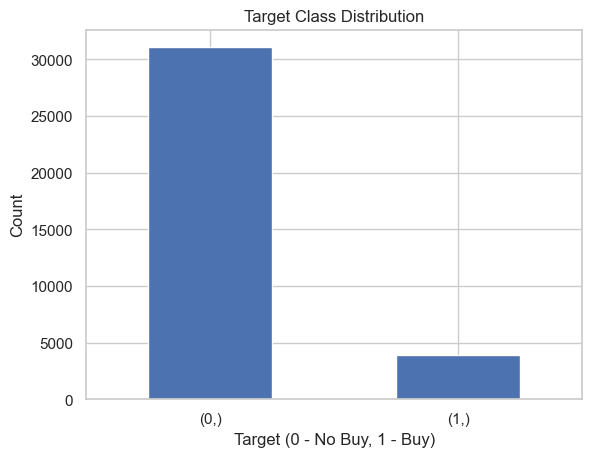

Response
0           88.771429
1           11.228571
Name: proportion, dtype: float64


In [64]:
target.value_counts().plot(kind='bar')
plt.title('Target Class Distribution')
plt.xlabel('Target (0 - No Buy, 1 - Buy)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print(target.value_counts(normalize=True)*100)

**Findings:**
1. Severe class imbalance detected: 0s (88.8%) and 1s (11.2%)

**Action Items:**
1. Perform stratified train-test-split (to maintain class proportions)
2. Train model with class_weight='balanced' or scale_pos_weight (efficient in handling imbalanced dataset without altering the original dataset)
3. Evaluate using F1-score (to balance false positives and false  negatives) and ROC-AUC (to determine how well the model separates classes)

### Missing Values and Data Types

In [65]:
# Check all features for missing values
features_names = df.columns[:-1]

for key, feature in enumerate(features_names):
    print(f'\nNumber of missing values in {feature}: {df[feature].isna().sum()}')
    print(f'Dtype of {feature}: {df[feature].dtype}')


Number of missing values in age: 0
Dtype of age: int64

Number of missing values in duration_latest: 0
Dtype of duration_latest: int64

Number of missing values in count_call_current: 0
Dtype of count_call_current: int64

Number of missing values in days_last_campaign: 0
Dtype of days_last_campaign: int64

Number of missing values in count_call_previous: 0
Dtype of count_call_previous: int64

Number of missing values in evr_quarterly: 0
Dtype of evr_quarterly: float64

Number of missing values in cpi_monthly: 0
Dtype of cpi_monthly: float64

Number of missing values in cci_monthly: 0
Dtype of cci_monthly: float64

Number of missing values in ibr_employee_quarterly: 0
Dtype of ibr_employee_quarterly: float64

Number of missing values in count_employee_quarterly: 0
Dtype of count_employee_quarterly: float64

Number of missing values in type_employment: 0
Dtype of type_employment: object

Number of missing values in civil_status: 0
Dtype of civil_status: object

Number of missing values 

### Numerical Features Analysis

In [66]:
# Summary Statistics
num_features = ['age',
'duration_latest',
'count_call_current',
'days_last_campaign',
'count_call_previous',
'evr_quarterly',
'cpi_monthly',
'cci_monthly',
'ibr_employee_quarterly',
'count_employee_quarterly']

df[num_features].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,35000.0,40.03,10.43,17.00,32.00,38.00,47.00,98.00
duration_latest,35000.0,257.84,258.59,0.00,102.00,179.00,318.00,4918.00
count_call_current,35000.0,2.56,2.77,1.00,1.00,2.00,3.00,56.00
days_last_campaign,35000.0,962.43,187.01,0.00,999.00,999.00,999.00,999.00
count_call_previous,35000.0,0.17,0.50,0.00,0.00,0.00,0.00,7.00
evr_quarterly,35000.0,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cpi_monthly,35000.0,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cci_monthly,35000.0,-40.52,4.62,-50.80,-42.70,-41.80,-36.40,-26.90
ibr_employee_quarterly,35000.0,3.62,1.73,0.63,1.34,4.86,4.96,5.04
count_employee_quarterly,35000.0,5167.04,72.17,4963.60,5099.10,5191.00,5228.10,5228.10


1. **age**
* Min/Max: 17 – 98 → Reasonable but consider filtering out age < 18 (if legally required)
* Mean/Median: 40.03 vs. 38.00 → Slight right skew
* Action: Assume the reliability of data for now in terms of age groups

2. **duration_latest (Call duration in seconds)**
* Mean = 257.8, Max = 4918 → Very long tail, strongly right-skewed
* Std = 258.6 ~ mean → high variance
* Action: Apply log transformation (e.g. log1p(duration_latest)) to reduce skew and help linear/semi-linear models (e.g. logistic regression)

3. **count_call_current**
* Mean = 2.56, Max = 56, 75% = 3 → Most values low, few extreme outliers
* Action: Due to extreme outliers, bin into ordinal groups (e.g. ordinal group of 10+ captures all extreme outliers) for Logistic Regression; keep as is for tree-based models

4. **days_last_campaign**
* Key Insight: 999 is used to encode “no previous campaign”
* Mean = 962, but 25–75% are all 999
* Action: Create a binary indicator: had_previous_campaign = days_last_campaign != 999
* Replace 999 with NaN or a constant (e.g., 0) after creating the flag

5. **count_call_previous**
* Mostly zeros (mean = 0.17, 75% = 0)
* Max = 7 → Rare cases with high contact
* Action: Bin into ordinal groups (e.g., 0, 1, 2+); keep as for tree-based models

6. **evr_quarterly (Employment variation rate)**
* Min = -3.4, Max = 1.4
* Slight left-skewed; high variance relative to mean
* Action: Feature is valuable — macroeconomic pressure → keep as is

7. **cpi_monthly (Consumer Price Index)**
* Tight range (92.2 – 94.8), small standard deviation
* Action: Might not be highly informative alone, but keep as is for interaction effects

8. **cci_monthly (Consumer Confidence Index)**
* Negative values (normal for CCI), range: -50.8 to -26.9
* Action: Keep as is; possibly important — more negative = lower buying confidence

9. **ibr_employee_quarterly (3-month interbank rate)**
* Median = 4.86, Max = 5.04, but Min = 0.63 → bimodal distribution likely
* Action: Standardization helpful here; check for time-based effects

10. **count_employee_quarterly**
* Narrow range: 4963.6 – 5228.1
* Low std relative to mean — might be static, so low variance warning
* Action: Consider dropping if model shows it’s not informative

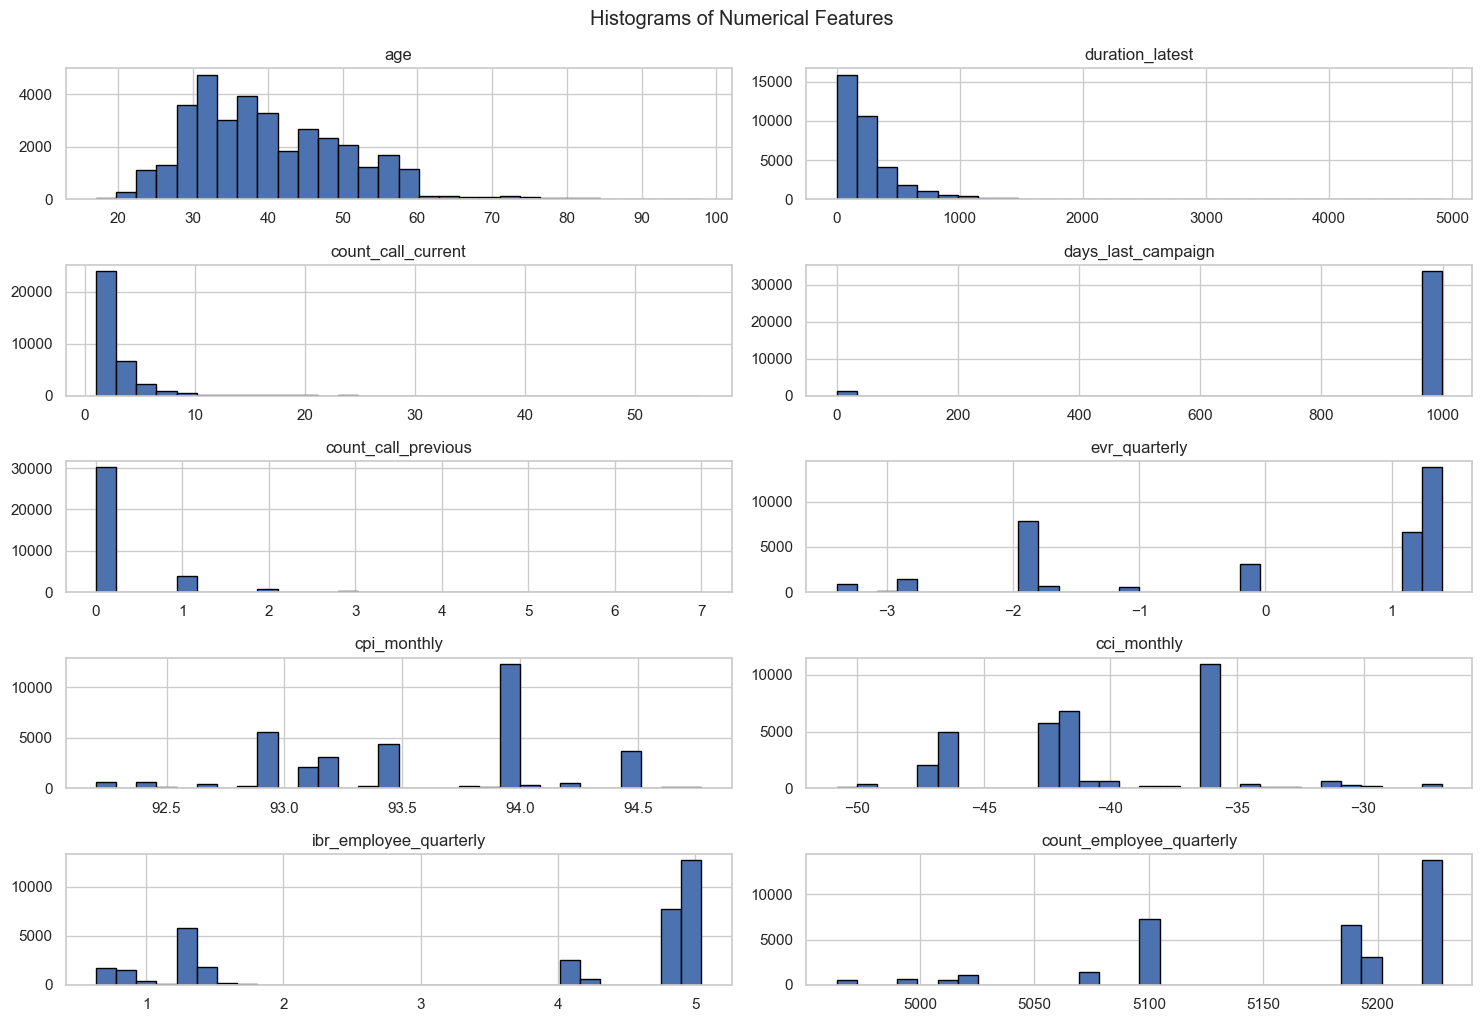

In [67]:
# Histograms
df[num_features].hist(bins=30, figsize=(15, 10), layout=(5, 2), edgecolor='black')
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

**Findings**
1. **age**: most values fall between 20-60; looks normally distributed from 20-60 however right-skewed for all data
2. **duration_latest**: highly right-skewed
3. **count_call_current**: highly right-skewed
4. **days_last_campaign**: nearly all values are at 999
5. **count_call_previous**: mostly 0s
6. **evr_quarterly**: looks random
7. **cpi_monthly**: looks normally-distributed
8. **cci_monthly**: looks random
9. **ibr_employee_quarterly**: looks bi-modal distribution
10. **count_employee_quarterly**: most data on the higher end

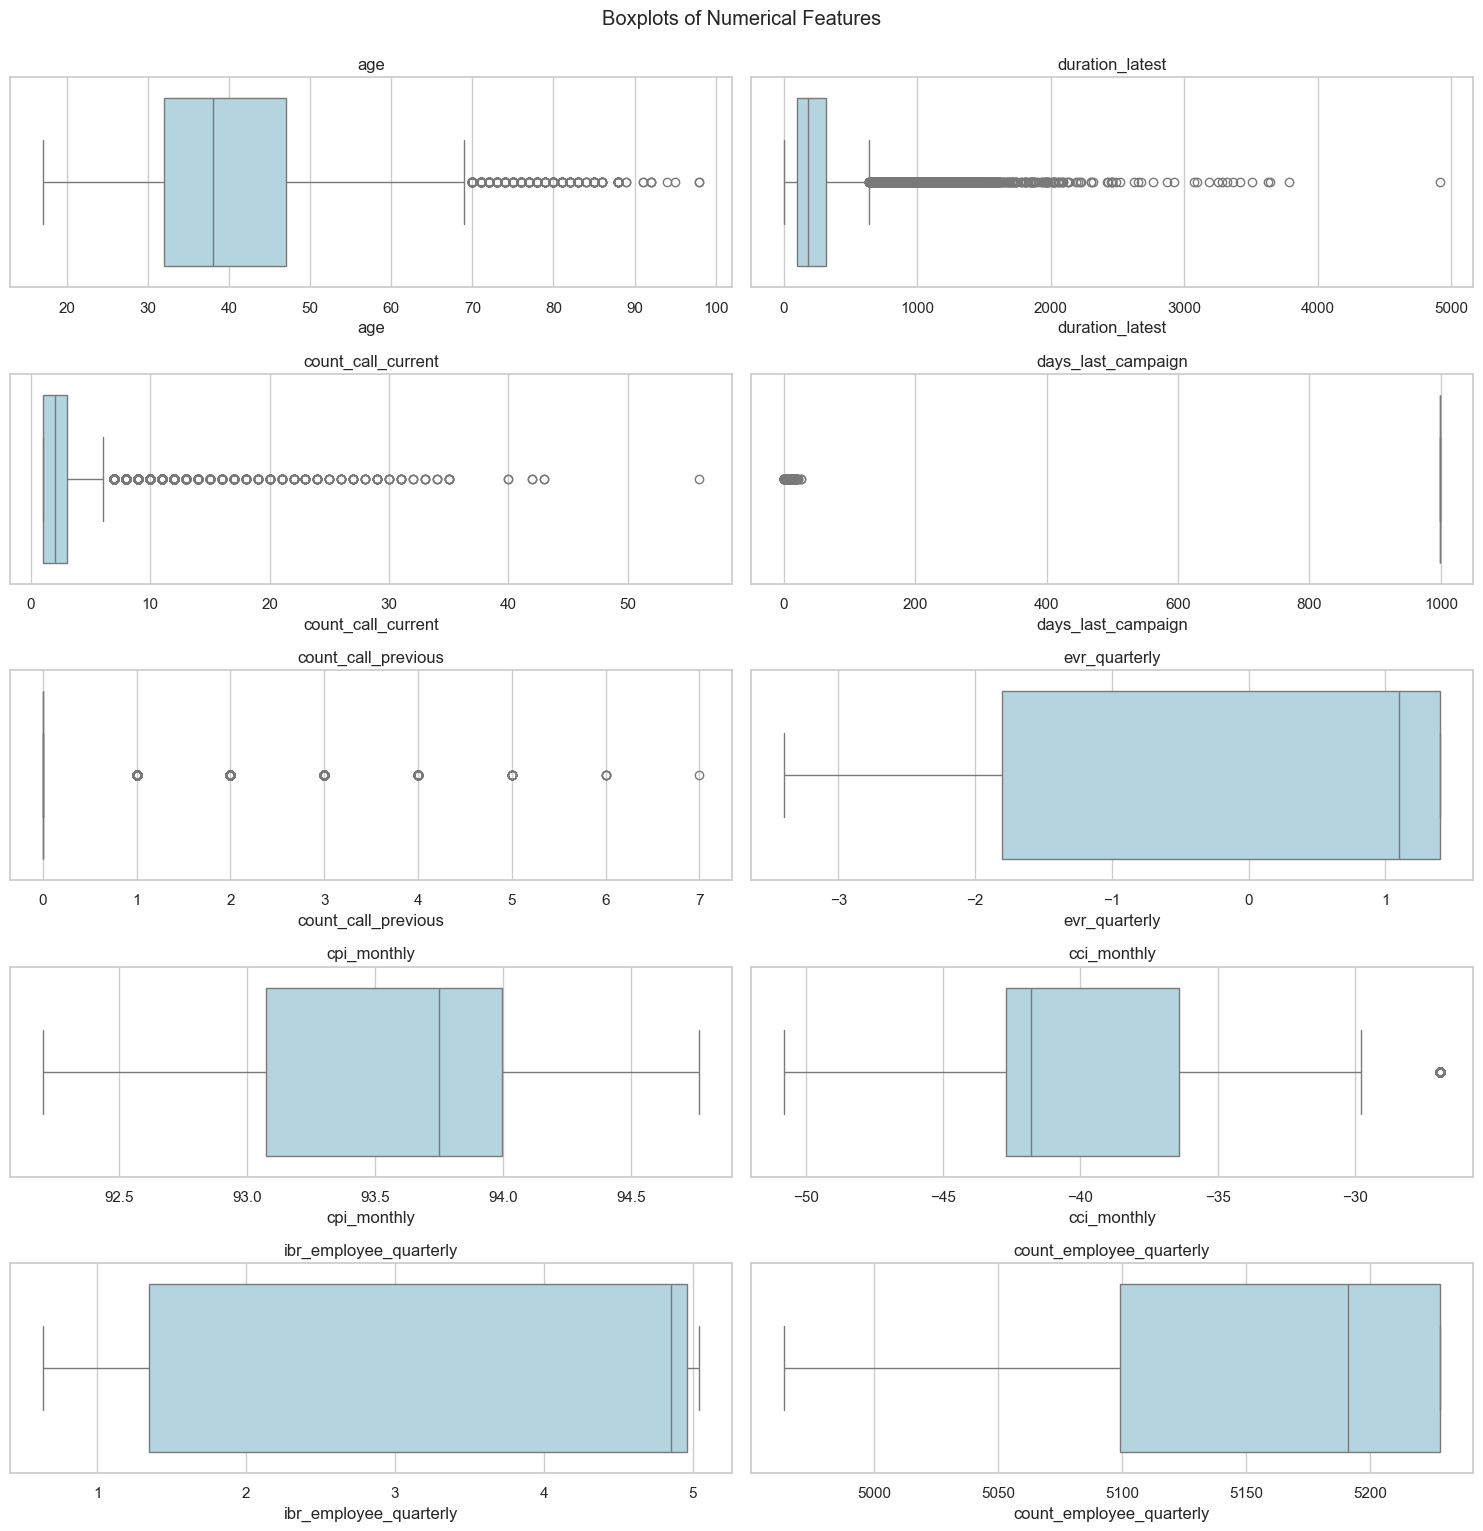

In [68]:
# Boxplots to detect outliers
plt.figure(figsize=(15, 15))
for i, feature in enumerate(num_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(feature)
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', y=1.02)
plt.show()

In [69]:
# Correlation Heatmaps
corr = df.select_dtypes(include=['int64', 'float64']).corr()
pd.DataFrame(corr.round(2))

,age,duration_latest,count_call_current,days_last_campaign,count_call_previous,evr_quarterly,cpi_monthly,cci_monthly,ibr_employee_quarterly,count_employee_quarterly,Response
age,1.00,-0.00,0.00,-0.04,0.02,-0.00,0.00,0.13,0.01,-0.02,0.03
duration_latest,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.00,-0.01,-0.03,-0.05,0.41
count_call_current,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14,-0.07
days_last_campaign,-0.04,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37,-0.32
count_call_previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.46,-0.50,0.23
evr_quarterly,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91,-0.30
cpi_monthly,0.00,0.00,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52,-0.14
cci_monthly,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10,0.05
ibr_employee_quarterly,0.01,-0.03,0.14,0.30,-0.46,0.97,0.69,0.28,1.00,0.95,-0.31
count_employee_quarterly,-0.02,-0.05,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00,-0.35


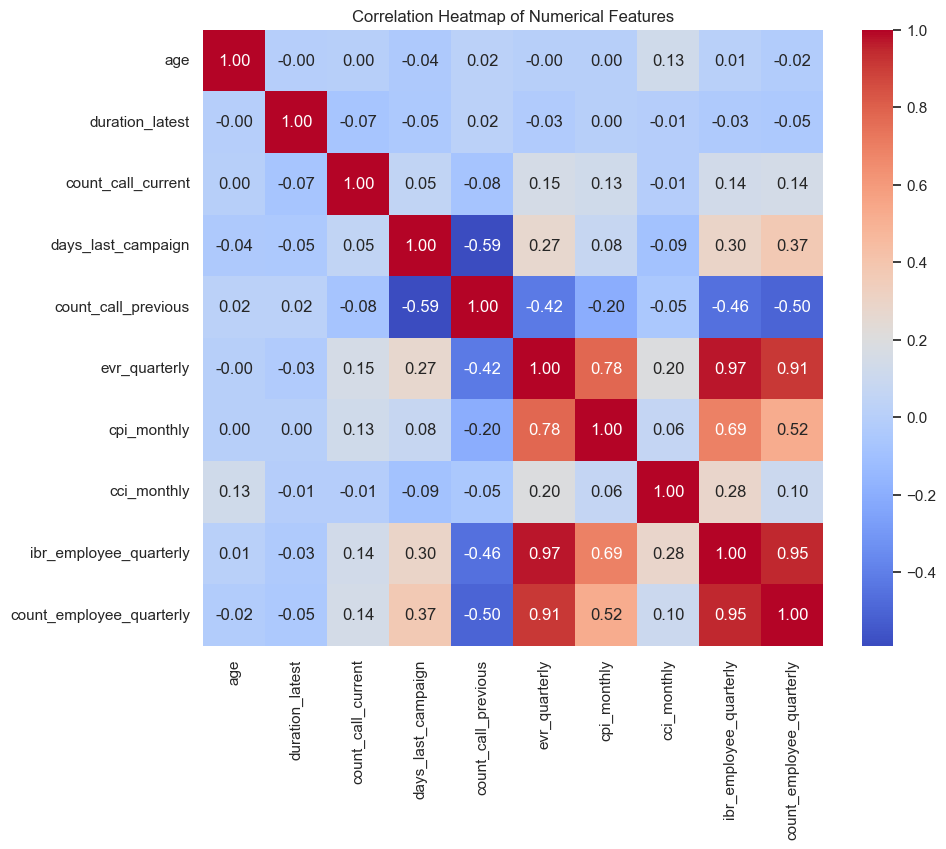

In [70]:
plt.figure(figsize=(10, 8))
corr_matrix = df[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [71]:
# Perform Variance Inflation Factor (VIF) Analysis for Multi-Collinearity
X = df[num_features]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

                     Feature            VIF
0                      const  529240.402341
9     ibr_employee_quarterly      64.405665
6              evr_quarterly      33.050443
10  count_employee_quarterly      31.719068
7                cpi_monthly       6.330633
8                cci_monthly       2.655658
5        count_call_previous       1.811334
4         days_last_campaign       1.625729
3         count_call_current       1.037959
1                        age       1.018874
2            duration_latest       1.009576


In [72]:
# Keep dropping the feature with highest VIF > 10 until all are < 10
while True:
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]
    
    max_vif = vif_data.loc[vif_data['Feature'] != 'const', 'VIF'].max()
    if max_vif <= 10:
        break
    
    drop_feature = vif_data.sort_values('VIF', ascending=False)['Feature'].values[0]
    print(f"Dropping feature: {drop_feature}")
    X = X.drop(columns=[drop_feature])

print(X.columns)

Dropping feature: const
Dropping feature: count_employee_quarterly
Dropping feature: cpi_monthly
Dropping feature: ibr_employee_quarterly
Dropping feature: cci_monthly
Dropping feature: days_last_campaign
Index(['age', 'duration_latest', 'count_call_current', 'count_call_previous',
       'evr_quarterly'],
      dtype='object')


**Findings:**

**Feature to Target Correlation**
* duration_latest: +0.41 - Strongest positive correlation — customers who stay longer on the call are more likely to buy. Likely top predictive feature.
* count_call_previous: +0.23 - Moderate relationship — more calls in previous campaign → higher buy probability
* cci_monthly: +0.05 - Weak positive, not a strong predictor on its own
* age: +0.03 - Negligible effect
* count_call_current: –0.07 - Slight inverse — frequent calling might annoy customers or reflect unproductive efforts
* days_last_campaign:	–0.32 - Strong negative — long delay since last contact reduces chance to buy
* evr_quarterly: –0.30 - Negative — could reflect economic slowdown dampening buying behavior
* ibr_employee_quarterly:	–0.31 - Negative — possibly linked to tight economic conditions
* count_employee_quarterly: –0.35 - Negative — may indicate structural economy-wide trends
* cpi_monthly: –0.14 - Weak negative

**Check for multi-collinearity**
* evr_quarterly – ibr_employee_quarterly: +0.97 - Very strong correlation
* ibr_employee_quarterly – count_employee_quarterly: +0.95	Very strong correlation
* evr_quarterly – count_employee_quarterly: +0.91 - Highly redundant
* days_last_campaign – count_call_previous: –0.59 - High inverse, but meaningful to keep both
* For high multi-collinearity, keep evr_quarterly for now (lower correlation coefficient) for Logistic Regression
* Keeping evr_quarterly instead of ibr_employee_quarterly and count_employee_quarterly os supported by the VIF analysis.

### Categorical Features Analysis

In [73]:
# Value Counts
def categorical_analysis(df, cat_cols, target='Response'):
    for col in cat_cols:
        print(f'\n{col.upper()}')
        print(df[col].value_counts(dropna=False, normalize=True))
        print(f'\nTarget Distribution: ')
        print(df.groupby(col)[target].value_counts(normalize=True).unstack().round(3))

cat_features = [
    'type_employment', 'civil_status', 'highest_educ', 'credit_facility',
    'home_loan', 'personal_loan', 'contact_medium',
    'month_last_contacted', 'dow_last_contacted', 'previous_campaign'
]

categorical_analysis(df, cat_features)


TYPE_EMPLOYMENT
type_employment
Cat_0_a***.     0.253314
Cat_1_b***r     0.224514
Cat_9_t***n     0.163914
Cat_7_s***s     0.095800
Cat_4_m***t     0.071114
Cat_5_r***d     0.041886
Cat_2_e***r     0.035886
Cat_6_s***d     0.034714
Cat_3_h***d     0.025743
Cat_10_u***d    0.023971
Cat_8_s***t     0.020771
Cat_11_u***n    0.008371
Name: proportion, dtype: float64

Target Distribution: 
Response             0      1
type_employment              
Cat_0_a***.      0.870  0.130
Cat_10_u***d     0.857  0.143
Cat_11_u***n     0.898  0.102
Cat_1_b***r      0.930  0.070
Cat_2_e***r      0.917  0.083
Cat_3_h***d      0.893  0.107
Cat_4_m***t      0.887  0.113
Cat_5_r***d      0.746  0.254
Cat_6_s***d      0.898  0.102
Cat_7_s***s      0.923  0.077
Cat_8_s***t      0.682  0.318
Cat_9_t***n      0.892  0.108

CIVIL_STATUS
civil_status
Cat_1_m***d    0.606057
Cat_2_s***e    0.280457
Cat_0_d***d    0.111514
Cat_3_u***n    0.001971
Name: proportion, dtype: float64

Target Distribution: 
Response    

**Findings:**

1. **type_employment**
* Classes with <3% frequency: cat_3, cat_10, cat_8, and cat_11 (consider combining as '_Others_')
* Cat_8 has a strong signal (31.8% Buy Rate) against the target
* Use Target Encoding for Logistic Regression to preserve model interpretability and Ordinal or Frequency Encoding for tree-based models

2. **civil_status**
* Cat_2 and Cat_3 have the highest response rates while Cat_1 and Cat_2 are the most frequent classes
* Use One-Hot Encoding since there are only few classes in this feature

3. **highest_educ**
* Keep as a predictor
* Use Target Encoding

4. **credit_facility**
* Strong separation between Cat_0 (higher buy rates) vs Cat_1
* Cat_2 could be dropped during One-Hot Encoding since it's portion is extremely small and has no buy records

5. **home_loan**
* Class separation is not strong  but could still be predictive
* Keep all classes
* Use One-Hot Encoding

6. **personal_loan**
* Weak class separation (super close buy rates across classes) but still worth keeping
* Use One-Hot Encoding

7. **contact_medium**
* High-value predictor due to strong class separation and highly balanced representation
* Use One-Hot Encoding

8. **month_last_contacted**
* Highly information feature due to strong class separation and seasonality
* Use Target Encoding for Logistic Regression and Ordinal or Frequency Encoding for tree-based models

9. **dow_last_contacted**
* Class separation isn't strong but could keep for now
* Use One-Hot Encoding

10. **previous_campaign**
* Strong class separation
* Use Ordinal Encoding due to obvious ordinal meaning: Success > Failure > Not Contacted

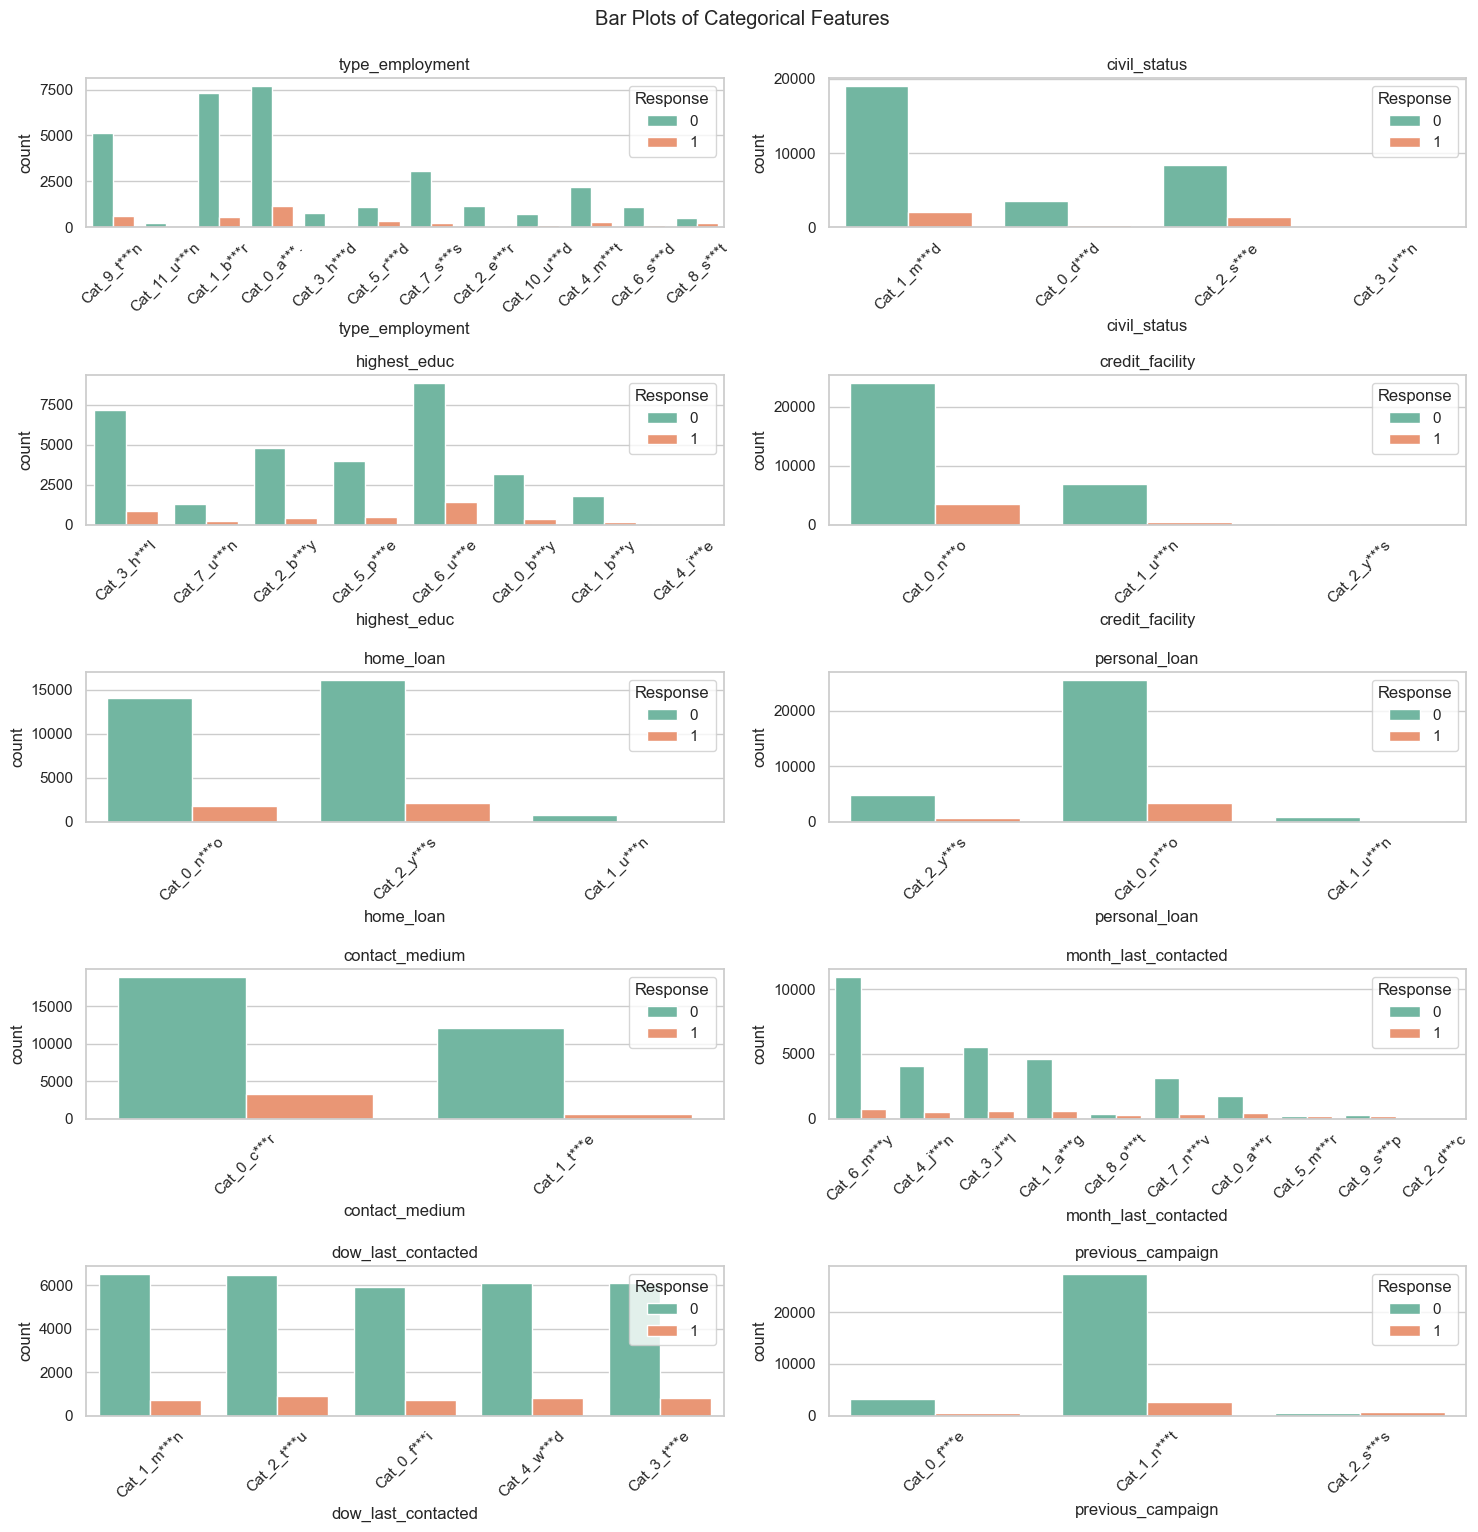

In [74]:
# Bar plots stratified by the target (Response)
plt.figure(figsize=(15, 15))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=feature, hue=df['Response'], palette='Set2')
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle('Bar Plots of Categorical Features', y=1.02)
plt.show()

In [75]:
# Check for the unique class
unique_vals = []

for col in cat_features:
    df_col_unique = df[col].nunique()
    unique_vals.append({col: df_col_unique})

unique_vals = pd.Series(unique_vals)
print(unique_vals)

0         {'type_employment': 12}
1             {'civil_status': 4}
2             {'highest_educ': 8}
3          {'credit_facility': 3}
4                {'home_loan': 3}
5            {'personal_loan': 3}
6           {'contact_medium': 2}
7    {'month_last_contacted': 10}
8       {'dow_last_contacted': 5}
9        {'previous_campaign': 3}
dtype: object


### Target_wise Analysis

In [76]:
# Numerical features by target
for col in num_features:
    print(f'\n{col.upper()}')
    print(df.groupby('Response')[col].agg(['mean','median']).round(2).T)


AGE
Response      0      1
mean      39.92  40.94
median    38.00  37.00

DURATION_LATEST
Response       0       1
mean      220.22  555.24
median    163.00  457.00

COUNT_CALL_CURRENT
Response     0     1
mean      2.63  2.05
median    2.00  2.00

DAYS_LAST_CAMPAIGN
Response       0       1
mean      983.82  793.32
median    999.00  999.00

COUNT_CALL_PREVIOUS
Response     0     1
mean      0.13  0.49
median    0.00  0.00

EVR_QUARTERLY
Response     0     1
mean      0.25 -1.23
median    1.10 -1.80

CPI_MONTHLY
Response      0      1
mean      93.60  93.35
median    93.92  93.20

CCI_MONTHLY
Response      0      1
mean     -40.61 -39.82
median   -41.80 -40.40

IBR_EMPLOYEE_QUARTERLY
Response     0     1
mean      3.81  2.13
median    4.86  1.27

COUNT_EMPLOYEE_QUARTERLY
Response        0        1
mean      5176.09  5095.47
median    5195.80  5099.10


**Findings:**

| Feature                                                  | Signal Strength | Reason                         |
| -------------------------------------------------------- | --------------- | ------------------------------ |
| `duration_latest`                                        | 4               | Strong separation              |
| `count_call_previous`                                    | 3               | Higher in buyers               |
| `days_last_campaign`                                     | 2               | Buyers contacted more recently |
| `evr_quarterly`                                          | 2               | Possible macroeconomic effect  |
| `count_call_current`                                     | 2               | Higher for non-buyers          |
| `age`                                                    | 1               | Weak separation                |
| `cpi_monthly`, `cci_monthly`, `count_employee_quarterly` | Low signal      | Might not be informative       |


In [77]:
# Categorical features by target
summary_list = []

for col in cat_features:
    summary = df.groupby(col)['Response'].agg(['count','mean']).reset_index()
    summary.columns = [col,'count','target_rate']
    summary['proportion'] = summary['count'] / summary['count'].sum()
    summary_list.append(summary.sort_values(by='target_rate', ascending=False))

In [78]:
summary_list

[   type_employment  count  target_rate  proportion
 10     Cat_8_s***t    727     0.317744    0.020771
 7      Cat_5_r***d   1466     0.254434    0.041886
 1     Cat_10_u***d    839     0.143027    0.023971
 0      Cat_0_a***.   8866     0.129596    0.253314
 6      Cat_4_m***t   2489     0.112897    0.071114
 11     Cat_9_t***n   5737     0.107547    0.163914
 5      Cat_3_h***d    901     0.106548    0.025743
 2     Cat_11_u***n    293     0.102389    0.008371
 8      Cat_6_s***d   1215     0.102058    0.034714
 4      Cat_2_e***r   1256     0.082803    0.035886
 9      Cat_7_s***s   3353     0.076946    0.095800
 3      Cat_1_b***r   7858     0.069611    0.224514,
   civil_status  count  target_rate  proportion
 3  Cat_3_u***n     69     0.159420    0.001971
 2  Cat_2_s***e   9816     0.139976    0.280457
 0  Cat_0_d***d   3903     0.101973    0.111514
 1  Cat_1_m***d  21212     0.101216    0.606057,
   highest_educ  count  target_rate  proportion
 4  Cat_4_i***e     17     0.23529

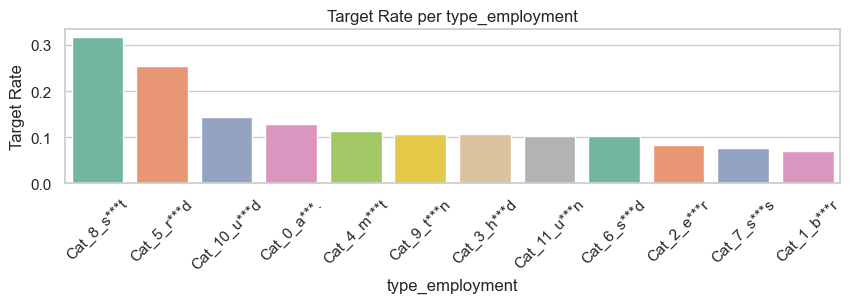

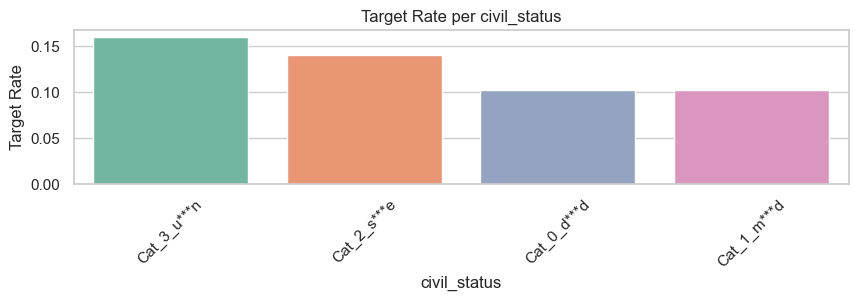

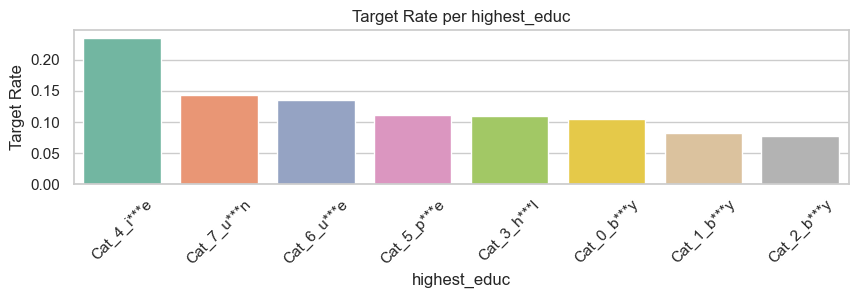

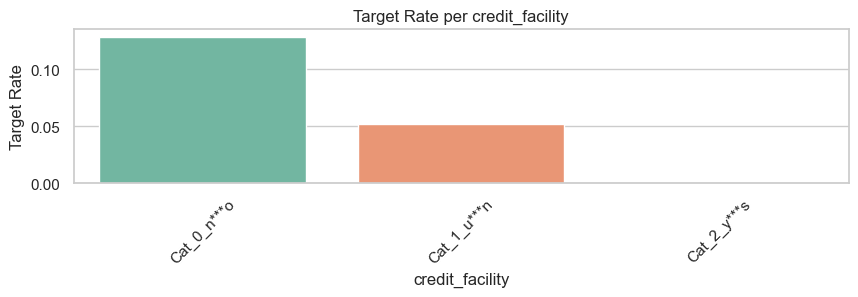

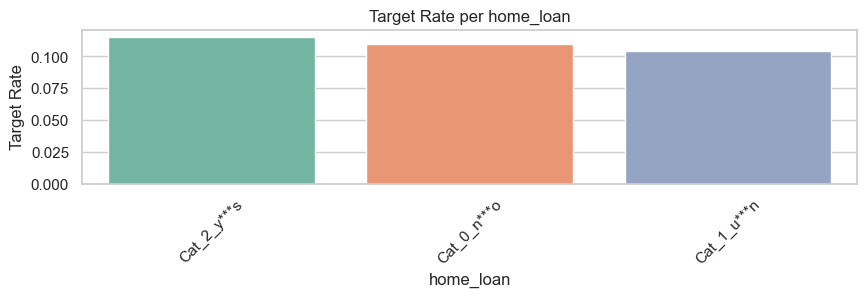

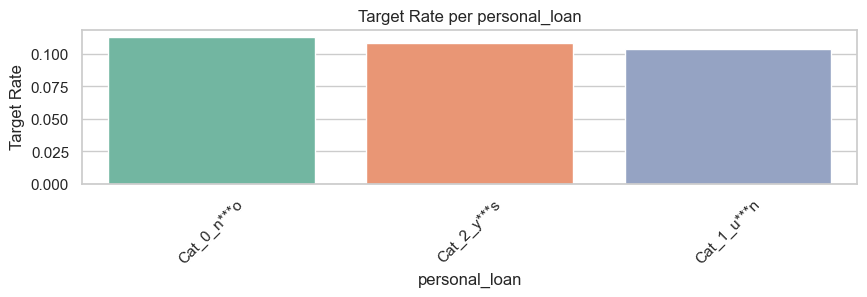

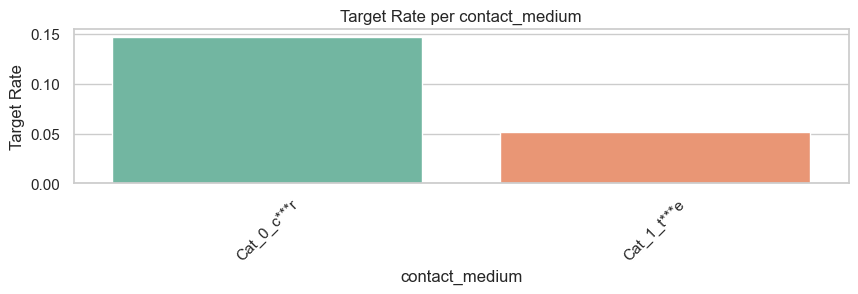

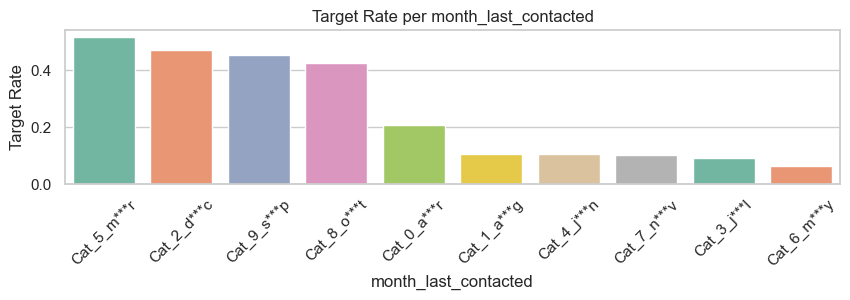

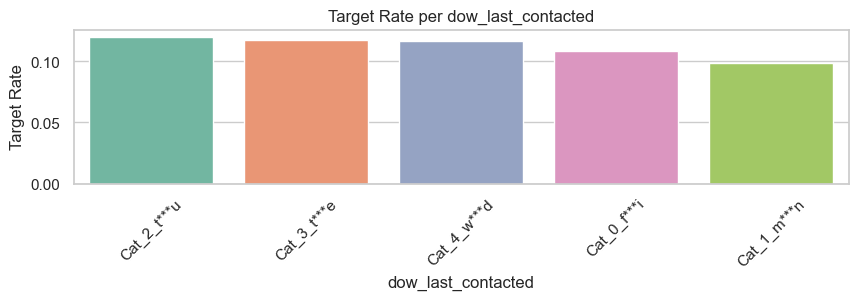

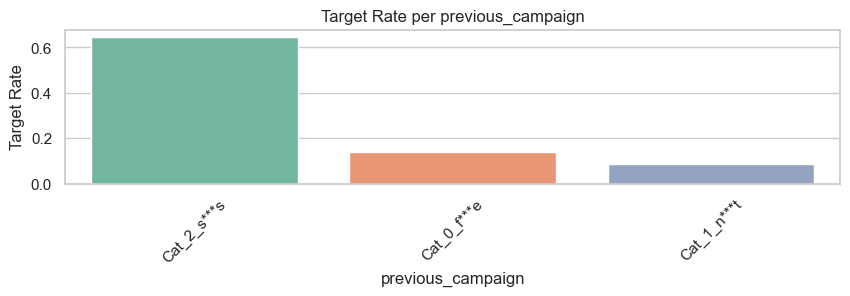

In [79]:
for i, feature in enumerate(summary_list):
    plt.figure(figsize=(10, 2))
    sns.barplot(
        data=feature.sort_values('target_rate', ascending=False),
        x=cat_features[i],
        y=feature.iloc[:,[2]].columns.values[0],
        palette='Set2'
    )
    plt.title(f'Target Rate per {cat_features[i]}')
    plt.xticks(rotation=45)
    plt.xlabel(cat_features[i])
    plt.ylabel('Target Rate')
plt.show()

**FIndings:**

* Huge target signal separate observed for features: type_employment, civil_status, highest educ, credit_facility, contact_medium, month_last_contacted, and previous campaign signifying highly informative predictors.

### Features Transformation

In [80]:
df.columns

Index(['age', 'duration_latest', 'count_call_current', 'days_last_campaign',
       'count_call_previous', 'evr_quarterly', 'cpi_monthly', 'cci_monthly',
       'ibr_employee_quarterly', 'count_employee_quarterly', 'type_employment',
       'civil_status', 'highest_educ', 'credit_facility', 'home_loan',
       'personal_loan', 'contact_medium', 'month_last_contacted',
       'dow_last_contacted', 'previous_campaign', 'Response'],
      dtype='object')

In [81]:
# Removing collinear features
df_processed = df.loc[:,['age', 'duration_latest', 'count_call_current', 'days_last_campaign',
       'count_call_previous', 'evr_quarterly', 'cpi_monthly', 'cci_monthly',
       'type_employment','civil_status', 'highest_educ', 'credit_facility', 'home_loan',
       'personal_loan', 'contact_medium', 'month_last_contacted',
       'dow_last_contacted', 'previous_campaign', 'Response']]

In [82]:
# Box-Cox transformation for duration_latest: transform
shift = 0
if (df_processed['duration_latest'] <= 0).any():
    shift = abs(df_processed['duration_latest'].min()) + 1
    df_feature_shifted = df_processed['duration_latest'] + shift
else:
    df_feature_shifted = df['duration_latest']

df_boxcox_trasformed,fitted_lambda = boxcox(df_feature_shifted)

df_processed['duration_latest'] = df_boxcox_trasformed

print(f'Optimal lambda: {fitted_lambda:.4f}')

Optimal lambda: 0.1252


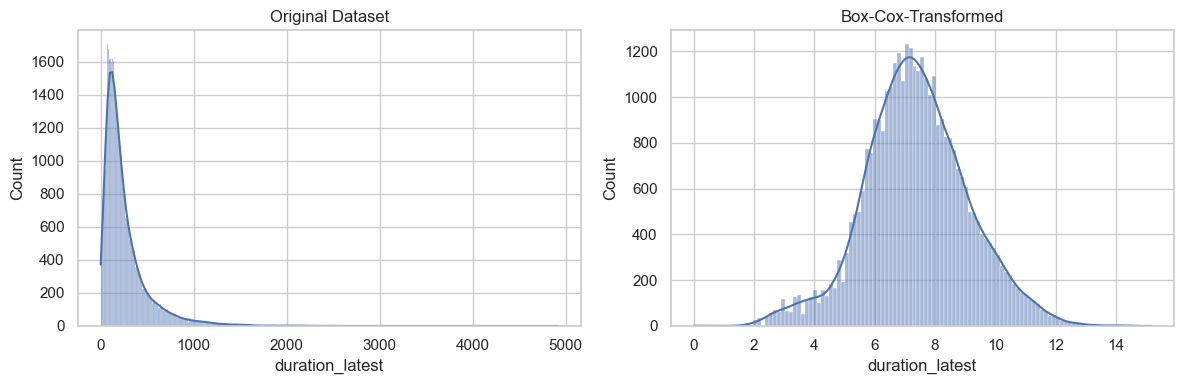

In [83]:
# Box-Cox transformation for duration_latest: plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['duration_latest'], kde=True, ax = axs[0])
axs[0].set_title('Original Dataset')

sns.histplot(df_processed['duration_latest'], kde=True, ax=axs[1])
axs[1].set_title('Box-Cox-Transformed')

plt.tight_layout()
plt.show()

In [84]:
# Box-Cox transformation for count_call_current: transform
shift = 0
if (df_processed['count_call_current'] <= 0).any():
    shift = abs(df_processed['count_call_current'].min()) + 1
    df_feature_shifted = df_processed['count_call_current'] + shift
else:
    df_feature_shifted = df['count_call_current']

df_boxcox_transformed, fitted_lambda = boxcox(df_feature_shifted)

df_processed['count_call_current'] = df_boxcox_transformed

print(f'Optimal lambda: {fitted_lambda:.4f}')

Optimal lambda: -0.6680


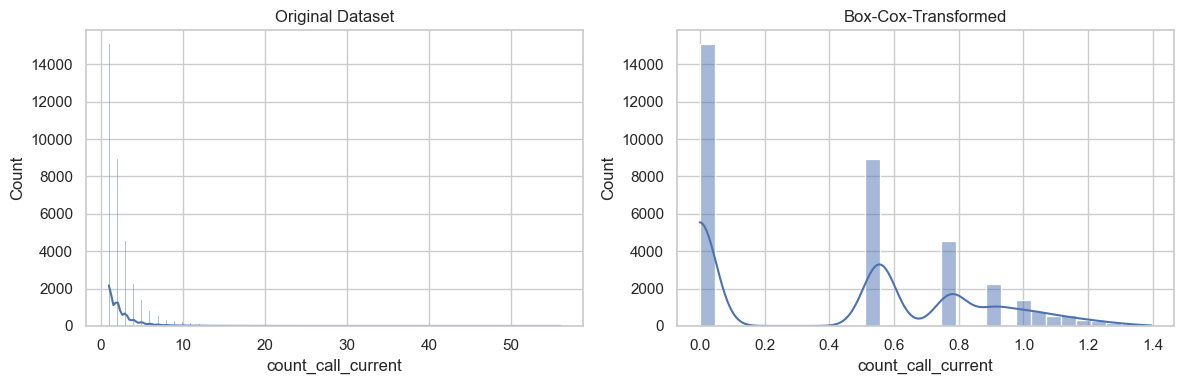

In [85]:
# Box-Cox transformation for count_call_current: plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['count_call_current'], kde=True, ax = axs[0])
axs[0].set_title('Original Dataset')

sns.histplot(df_processed['count_call_current'], kde=True, ax=axs[1])
axs[1].set_title('Box-Cox-Transformed')

plt.tight_layout()
plt.show()

In [86]:
# Binary indicator for days_last_campaign: 0- none, 1- had previous calls
df_processed['days_last_campaign'] = np.where(df_processed['days_last_campaign'] == 999, 0, 1)

print(df_processed['days_last_campaign'].value_counts())

days_last_campaign
0    33711
1     1289
Name: count, dtype: int64


In [87]:
# Check the % of Cat_2 in credit_facility and remove if not over 5% of the total data
cat_2_count = df_processed['credit_facility'].value_counts()[-1] / df_processed['credit_facility'].shape[0]
print(f'\nPortion of Cat_2: {(cat_2_count*100).round(4)} %\n')

cat_2_index = df_processed[df_processed['credit_facility'] == 'Cat_2_y***s'].index
df_processed.drop(index=cat_2_index, inplace=True)

print(f'New total number of records: {df_processed.shape}')


Portion of Cat_2: 0.0086 %

New total number of records: (34997, 19)


In [88]:
# Duplicate df_processed to df_tree and df_logreg
df_tree = df_processed.copy().reset_index(drop=True)
df_logreg = df_processed.copy().reset_index(drop=True)

In [89]:
# Encode type_employment: Frequency Encoding (tree-based), Target Encoding (Logistic Regression)
freq_map = df_tree['type_employment'].value_counts(normalize=True) # frequency encoding
df_tree['type_employment'] = df_tree['type_employment'].map(freq_map)

target_mean = df_logreg.groupby('type_employment')['Response'].mean() # target mean encoding
df_logreg['type_employment'] = df_logreg['type_employment'].map(target_mean)

print(df_tree.shape)
print(df_logreg.shape)

(34997, 19)
(34997, 19)


In [90]:
# Encoding civil_status: One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_tree[['civil_status']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['civil_status']))
encoded_df.index = df_tree.index
df_tree = pd.concat([df_tree.drop(columns='civil_status'), encoded_df], axis=1)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_logreg[['civil_status']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['civil_status']))
encoded_df.index = df_logreg.index
df_logreg = pd.concat([df_logreg.drop(columns='civil_status'), encoded_df], axis=1)

print(df_tree.shape)
print(df_logreg.shape)

(34997, 21)
(34997, 21)


In [91]:
# Encode highest_educ: Frequency Encoding(tree-based), Target Encoding(Logistic Regression)
freq_map = df_tree['highest_educ'].value_counts(normalize=True) # frequency encoding
df_tree['highest_educ'] = df_tree['highest_educ'].map(freq_map)

target_mean = df_logreg.groupby('highest_educ')['Response'].mean() # target mean encoding
df_logreg['highest_educ'] = df_logreg['highest_educ'].map(target_mean)

print(df_tree['highest_educ'])
print(df_logreg['highest_educ'])

0        0.229763
1        0.042204
2        0.147898
3        0.229763
4        0.229763
           ...   
34992    0.294654
34993    0.294654
34994    0.056091
34995    0.229763
34996    0.229763
Name: highest_educ, Length: 34997, dtype: float64
0        0.109315
1        0.142857
2        0.078053
3        0.109315
4        0.109315
           ...   
34992    0.136152
34993    0.136152
34994    0.082527
34995    0.109315
34996    0.109315
Name: highest_educ, Length: 34997, dtype: float64


In [92]:
# Encoding home_loan: One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_tree[['home_loan']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['home_loan']))
encoded_df.index = df_tree.index
df_tree = pd.concat([df_tree.drop(columns='home_loan'), encoded_df], axis=1)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_logreg[['home_loan']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['home_loan']))
encoded_df.index = df_logreg.index
df_logreg = pd.concat([df_logreg.drop(columns='home_loan'), encoded_df], axis=1)

print(df_tree.shape)
print(df_logreg.shape)

(34997, 22)
(34997, 22)


In [93]:
# Encoding personal_loan: One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_tree[['personal_loan']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['personal_loan']))
encoded_df.index = df_tree.index
df_tree = pd.concat([df_tree.drop(columns='personal_loan'), encoded_df], axis=1)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_logreg[['personal_loan']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['personal_loan']))
encoded_df.index = df_logreg.index
df_logreg = pd.concat([df_logreg.drop(columns='personal_loan'), encoded_df], axis=1)

print(df_tree.shape)
print(df_logreg.shape)

(34997, 23)
(34997, 23)


In [94]:
# Encoding contact_medium: One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_tree[['contact_medium']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['contact_medium']))
encoded_df.index = df_tree.index
df_tree = pd.concat([df_tree.drop(columns='contact_medium'), encoded_df], axis=1)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_logreg[['contact_medium']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['contact_medium']))
encoded_df.index = df_logreg.index
df_logreg = pd.concat([df_logreg.drop(columns='contact_medium'), encoded_df], axis=1)

print(df_tree.shape)
print(df_logreg.shape)

(34997, 23)
(34997, 23)


In [95]:
# Encoding dow_last_contacted: One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_tree[['dow_last_contacted']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['dow_last_contacted']))
encoded_df.index = df_tree.index
df_tree = pd.concat([df_tree.drop(columns='dow_last_contacted'), encoded_df], axis=1)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_logreg[['dow_last_contacted']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['dow_last_contacted']))
encoded_df.index = df_logreg.index
df_logreg = pd.concat([df_logreg.drop(columns='dow_last_contacted'), encoded_df], axis=1)

print(df_tree.shape)
print(df_logreg.shape)

(34997, 26)
(34997, 26)


In [96]:
# Encoding credit_facility: One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_tree[['credit_facility']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['credit_facility']))
encoded_df.index = df_tree.index
df_tree = pd.concat([df_tree.drop(columns='credit_facility'), encoded_df], axis=1)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded = encoder.fit_transform(df_logreg[['credit_facility']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['credit_facility']))
encoded_df.index = df_logreg.index
df_logreg = pd.concat([df_logreg.drop(columns='credit_facility'), encoded_df], axis=1)

print(df_tree.shape)
print(df_logreg.shape)

(34997, 26)
(34997, 26)


In [97]:
# Encode month_last_contacted: Frequency Encoding (tree-based), Target Encoding (Logistic Regression)
freq_map = df_tree['month_last_contacted'].value_counts(normalize=True) # frequency encoding
df_tree['month_last_contacted'] = df_tree['month_last_contacted'].map(freq_map)

target_mean = df_logreg.groupby('month_last_contacted')['Response'].mean() # target mean encoding
df_logreg['month_last_contacted'] = df_logreg['month_last_contacted'].map(target_mean)

print(df_tree.shape)
print(df_logreg.shape)

(34997, 26)
(34997, 26)


In [98]:
df['previous_campaign'].value_counts()

previous_campaign
Cat_1_n***t    30192
Cat_0_f***e     3646
Cat_2_s***s     1162
Name: count, dtype: int64

In [99]:
# Ordinal Encoding for previous_campaign
order = [['Cat_2_s***s','Cat_0_f***e','Cat_1_n***t']]
encoder = OrdinalEncoder(categories=order)
encoded = encoder.fit_transform(df_tree[['previous_campaign']])
df_tree['previous_campaign'] = encoded.astype(int)

encoded = encoder.fit_transform(df_logreg[['previous_campaign']])
df_logreg['previous_campaign'] = encoded.astype(int)

print(df_tree.shape)
print(df_logreg.shape)

(34997, 26)
(34997, 26)


In [100]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34997 entries, 0 to 34996
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             34997 non-null  int64  
 1   duration_latest                 34997 non-null  float64
 2   count_call_current              34997 non-null  float64
 3   days_last_campaign              34997 non-null  int64  
 4   count_call_previous             34997 non-null  int64  
 5   evr_quarterly                   34997 non-null  float64
 6   cpi_monthly                     34997 non-null  float64
 7   cci_monthly                     34997 non-null  float64
 8   type_employment                 34997 non-null  float64
 9   highest_educ                    34997 non-null  float64
 10  month_last_contacted            34997 non-null  float64
 11  previous_campaign               34997 non-null  int64  
 12  Response                        

In [101]:
df_logreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34997 entries, 0 to 34996
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             34997 non-null  int64  
 1   duration_latest                 34997 non-null  float64
 2   count_call_current              34997 non-null  float64
 3   days_last_campaign              34997 non-null  int64  
 4   count_call_previous             34997 non-null  int64  
 5   evr_quarterly                   34997 non-null  float64
 6   cpi_monthly                     34997 non-null  float64
 7   cci_monthly                     34997 non-null  float64
 8   type_employment                 34997 non-null  float64
 9   highest_educ                    34997 non-null  float64
 10  month_last_contacted            34997 non-null  float64
 11  previous_campaign               34997 non-null  int64  
 12  Response                        

In [102]:
# Export cleaned dataset: dataset_tree and dataset_logreg
df_tree.to_csv('dataset_tree.csv', index=False)
df_logreg.to_csv('dataset_logreg.csv', index=False)